# Spaceship Titanic
รูปแบบโจทย์ของ Spaceship Titanic เป็น Binary Classification โดยต้องทำนายว่าผู้โดยสารคนไหนที่ถูกส่งไปยังมิติอื่นบ้าง

# Import Library ที่จำเป็น โดยมีดังนี้

* numpy : ไลบรารีสำหรับใช้คำนวณ
* pandas : ไลบรารีสำหรับใช้จัดการและวิเคราะห์ข้อมูล
* matplotlib : ไลบรารีสำหรับใช้แสดงภาพข้อมูลและกราฟ
* seaborn : ไลบรารีสำหรับใช้พล็อตกราฟ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline 

Import Dataset ที่ต้องการใช้และตรวจสอบขนาด

In [2]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv', index_col='PassengerId')
print('train dataframe dimensions:', train_df.shape)
print('test dataframe dimensions:', test_df.shape)

train dataframe dimensions: (8693, 13)
test dataframe dimensions: (4277, 12)


# ตรวจสอบภาพรวมของ Dataset

<h3>รายละเอียดชุดข้อมูล</h3>

*   PassengerId : รหัสประจำตัวของผู้โดยสารแต่ละคน โดยจะอยู่ในรูปแบบ gggg_pp ซึ่ง gggg เป็นกลุ่มของผู้โดยสาร และ pp เป็นหมายเลขของผู้โดยสารคนนั้น ๆ ในกลุ่ม โดยส่วนใหญ่ผู้โดยสารในกลุ่มเดียวกันมักเป็นครอบครัวเดียวกันแต่ก็ไม่เสมอไป
*   HomePlanet : ชื่อดาวเคราะห์บ้านเกิดก่อนที่ผู้โดยสารจะขึ้นยานมา				
*   CryoSleep : ค่าที่บอกว่าผู้โดยสารคนนั้นนอนในแคปซูลแบบ Cryo Sleep ในห้องโดยสารของพวกเขาหรือไม่
*   Cabin : หมายเลขห้องโดยสาร จะอยู่ในรูปแบบ deck/num/side โดย side นั้นจะเป็นมีแค่ P (Port) หรือ S (Starboard) เท่านั้น
*   Destination : จุดหมายปลายทางที่ผู้โดยสารจะเดินทางไป
*   Age : อายุของผู้โดยสาร
*   VIP : ระบุถึงสถานะของผู้โดยสารว่าได้จ่ายเงินเพื่อบริการแบบ VIP หรือไม่
*   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : เป็นค่าใช้จ่ายที่ผู้โดยสารถูกเรียกเก็บจากการใช้งานสิ่งอำนวยความสะดวกต่าง ๆ ภายในยาน
*   Name : ชื่อและนามสกุลของผู้โดยสาร

<h3>ค่าที่ต้องการทำนาย</h3>

*   Transported : ค่าที่บอกว่าผู้โดยสารถูกส่งไปยังมิติอื่นหรือไม่











ตรวจสอบภาพรวมของชุดข้อมูล Train ว่ามีข้อมูลอะไรบ้าง ในที่นี้จะมีข้อมูล 14 คอลัมน์ 8693 แถว ซึ่งคอลัมน์ Transported มีข้อมูลที่ครบถ้วน และอีก 12 คอมลัมน์มีข้อมูลไม่ครบถ้วน

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [4]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train_df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis (EDA)
คือ กระบวนการตรวจสอบ และสำรวจข้อมูลเบื้องต้น โดยวิเคราะห์ข้อมูลที่จำเป็นก่อนนำข้อมูลไปใช้ หรือนำไปวิเคราะห์เชิงลึก

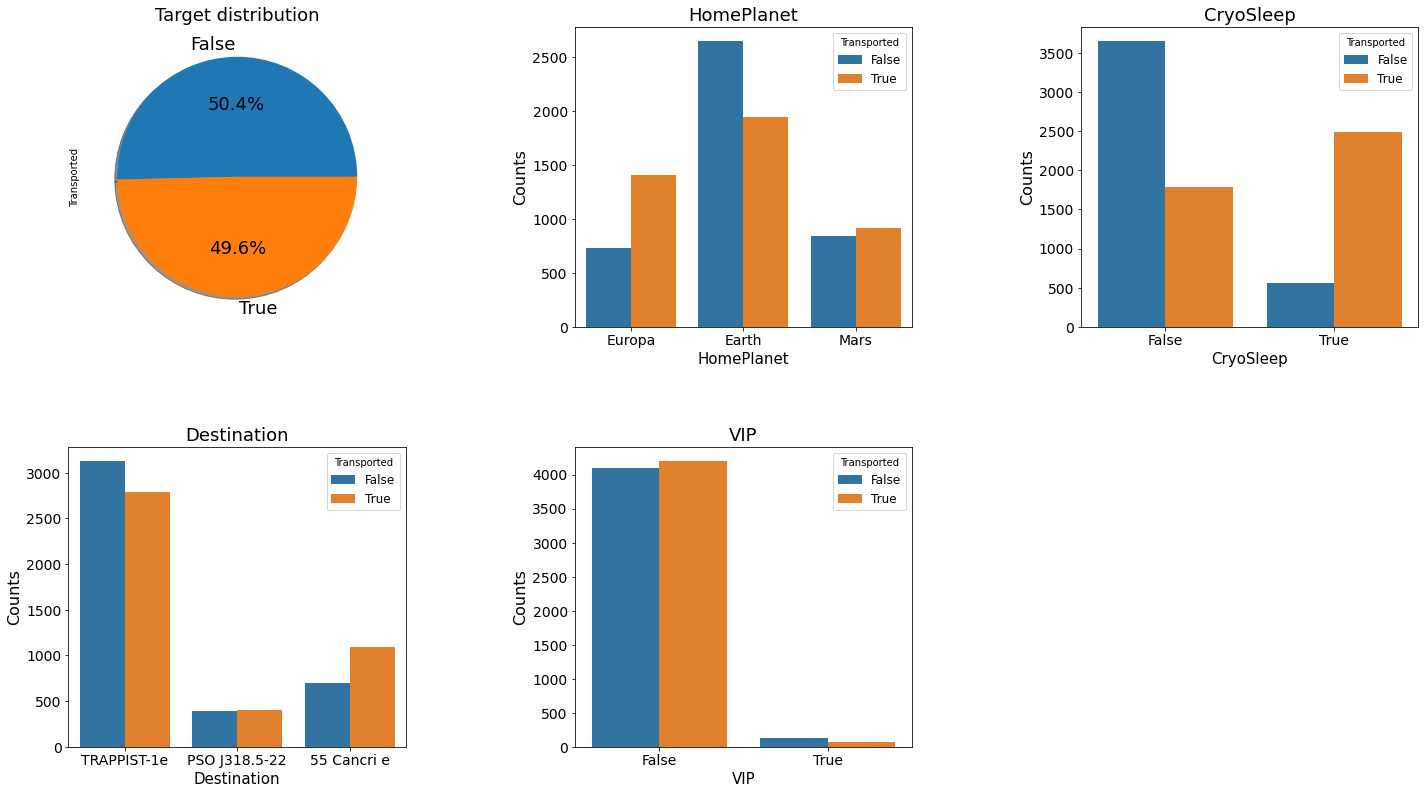

In [5]:
%matplotlib inline 
# Figure size
plt.figure(figsize=(15,5))

# Pie plot
plt.subplot(2, 3, 1)
labels = ('False', 'True')
train_df['Transported'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%', shadow=True,textprops={'fontsize':18}).set_title('Target distribution',fontsize=18 )

# Colounm Homeplanet plot
plt.subplot(2, 3, 2)
sns.countplot(data=train_df, x='HomePlanet', hue='Transported')
plt.title('HomePlanet',fontsize=18)
plt.xlabel('HomePlanet', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Column Cryosleep plot
plt.subplot(2, 3, 3)
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.title('CryoSleep',fontsize=18)
plt.xlabel('CryoSleep', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Column Destination plot
plt.subplot(2, 3, 4)
sns.countplot(data=train_df, x='Destination', hue='Transported')
plt.title('Destination',fontsize=18)
plt.xlabel('Destination', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Column VIP plot
plt.subplot(2, 3, 5)
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.title('VIP',fontsize=18)
plt.xlabel('VIP', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

plt.subplots_adjust(left=1.25, bottom=1, right=2.5, top=3, wspace=0.5, hspace=0.4)
plt.show()

*   Pie Chart แสดงสัดส่วนผู้โดยสารที่ถูกส่งไปยังมิติอื่นเป็น 50.4% และไม่ถูกส่งไปยังมิติอื่น 49.6%
*   Bar Chart HomePlanet เปรียบเทียบจำนวนผู้โดยสารจากดาวเคราะห์บ้านเกิด Europa, Earth, Mars ว่ามีสัดส่วนผู้โดยสารที่ถูกส่งและไม่ถูกส่งไปยังมิติอื่นเป็นเท่าไหร่
>ในที่นี้มีสัดส่วนผู้โดยสารที่มาจากดาวเคราะห์ Earth ถูกส่งไปยังมิติอื่นมากที่สุดตามด้วย Europa, Mars ตามลำดับ และสัดส่วนผู้โดยสารที่มาจากดาวเคราะห์ Earth ไม่ถูกส่งไปยังมิติอื่นมากที่สุดตามด้วย Mars, Europa ตามลำดับ
*   Bar Chart CryoSleep เปรียบเทียบจำนวนผู้โดยสารที่นอน และไม่นอนในแคปซูล Cryo Sleep ว่ามีสัดส่วนผู้โดยสารที่ถูกส่งและไม่ถูกส่งไปยังมิติอื่นเป็นเท่าไหร่
>ในที่นี้มีสัดส่วนผู้โดยสารที่นอนในแคปซูลถูกส่งไปยังมิติอื่นมากกว่าผู้โดยสารที่ไม่นอนในแคปซูล 
*   Bar Chart Destination เปรียบเทียบจำนวนผู้โดยสารที่มีจุดหมายปลายทางไป TRAPPIST-1e, PSO J318.5-22, 55 Cancri e ว่ามีสัดส่วนผู้โดยสารที่ถูกส่งและไม่ถูกส่งไปยังมิติอื่นเป็นเท่าไหร่
>ในที่นี้มีสัดส่วนผู้โดยสารที่มีจุดหมายปลายทางไป TRAPPIST-1e ถูกส่งไปยังมิติอื่นมากที่สุดตามด้วย 55 Cancri e, PSO J318.5-22 ตามลำดับ 
*   Bar Chart VIP เปรียบเทียบจำนวนผู้โดยสารที่มีสถานะ VIP ว่ามีสัดส่วนผู้โดยสารที่ถูกส่งและไม่ถูกส่งไปยังมิติอื่นเป็นเท่าไหร่
>ในที่นี้มีสัดส่วนผู้โดยสารที่ไม่เป็น VIP ถูกส่งไปยังมิติอื่นมากกว่าผู้โดยสารที่เป็น VIP












# Feature engineering
คือ ขั้นตอนสำหรับการสำรวจและจัดเตรียมข้อมูลให้เหมาะสมกับ Model เพื่อให้สามารถเทรน Model และทำนายผลได้ ไปจนถึงช่วยเพิ่มความถูกต้องแม่นยำในการทำนายผลของ Model ด้วย

แปลงข้อมูลในคอลัมน์ Transported จาก Boolean ให้เป็น Numeric โดยให้
> True = 1 , False = 0   

In [6]:
train_df['Transported'].replace(False, 0, inplace=True)
train_df['Transported'].replace(True, 1, inplace=True)

แบ่งข้อมูลจากคอลัมน์ Cabin ออกเป็น 3 คอลัมน์ใหม่ โดยใช้ชื่อว่า Deck, Num, Side ตามลำดับ หลังจากนั้นลบคอลัมน์ Cabin และ Name ที่ไม่ได้ใช้แล้วออก

In [7]:
def cabin_process(train,test):
  train[['Deck','Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
  test[['Deck','Num', 'Side']] = test['Cabin'].str.split('/', expand=True)

  return train,test

train_df , test_df = cabin_process(train_df,test_df)

train_df.drop(['Cabin','Name'], axis=1, inplace=True)
test_df.drop(['Cabin','Name'], axis=1, inplace=True)

สร้างคอลัมน์ใหม่ซึ่งเป็นผลรวมค่าใช้จ่ายของ RoomService, FoodCourt, ShoppingMall, Spa และ VRDeck ชื่อว่า SumSpends

In [8]:
col_to_sum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df['SumSpends'] = train_df[col_to_sum].sum(axis=1)
test_df['SumSpends'] = test_df[col_to_sum].sum(axis=1)

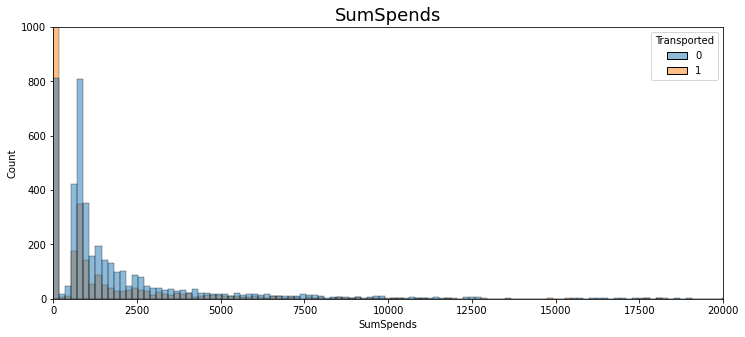

In [9]:
%matplotlib inline 
train_df['Expenditure']=train_df[col_to_sum].sum(axis=1)

fig=plt.figure(figsize=(12,5))
sns.histplot(data=train_df, x='SumSpends', hue='Transported', bins=200)
plt.title('SumSpends',fontsize=18)
plt.ylim([0,1000])
plt.xlim([0,20000])
plt.show()

*   Distribution Chart แสดงสัดส่วนผู้โดยสารที่ใช้จ่ายในส่วนต่างๆทั้งหมด เช่น RoomService, FoodCourt, ShoppingMall, Spa และ VRDeck

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


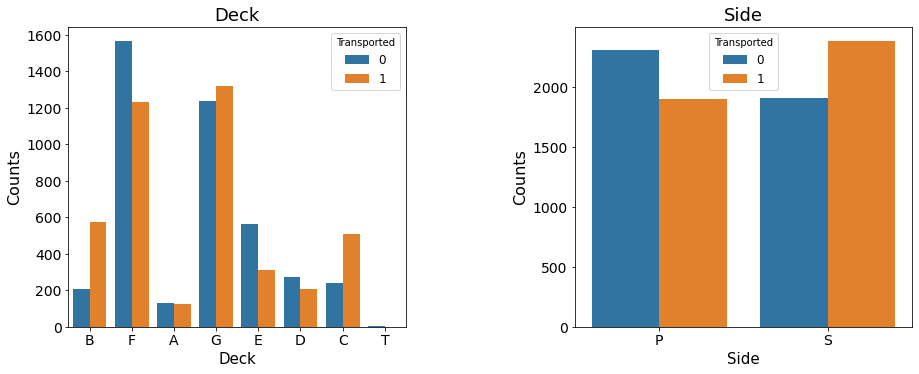

In [10]:
%matplotlib inline 
plt.figure(figsize=(15, 5))

# Colounm Deck plot
plt.subplot(2, 3, 1)
sns.countplot(train_df.Deck,hue=train_df.Transported);
plt.title('Deck',fontsize=18)
plt.xlabel('Deck', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Colounm Side plot
plt.subplot(2, 3, 2)
sns.countplot(train_df.Side,hue=train_df.Transported);
plt.title('Side',fontsize=18)
plt.xlabel('Side', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

plt.subplots_adjust(left=1.25, bottom=1, right=2.5, top=3, wspace=0.5, hspace=0.4)
plt.show()

*   Bar Chart Deck เปรียบเทียบจำนวนห้องของผู้โดยสารแต่ละโซน A, B, C, D, E, F, G, T ว่ามีสัดส่วนผู้โดยสารที่ถูกส่งและไม่ถูกส่งไปยังมิติอื่นเป็นเท่าไหร่
>ในที่นี้มีสัดส่วนผู้โดยสารที่อยู่โซน G ถูกส่งไปยังมิติอื่นมากที่สุดตามด้วยโซน F, B, C, E, D, A, T ตามลำดับ
*   Bar Chart Side เปรียบเทียบจำนวนขนาดห้องของผู้โดยสารว่ามีสัดส่วนผู้โดยสารที่ถูกส่งและไม่ถูกส่งไปยังมิติอื่นเป็นเท่าไหร่
>ในที่นี้ผู้โดยสารที่อยู่ขนาดห้อง S ถูกส่งไปยังมิติอื่นมากกว่าผู้โดยสารที่อยู่ขนาดห้อง P



# Preparing Data

ตรวจสอบคอลัมน์ที่มีข้อมูลเป็น Object และ Numeric ดังนี้
* Object : HomePlanet, CryoSleep, Destination, VIP, Deck, Num, Side 
* Numeric : Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, SumSpends

In [11]:
object_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' or train_df[col].dtype == 'category']
numeric_cols = [col for col in train_df.columns if train_df[col].dtype == 'float64']

print(f'Object cols -- {object_cols}')
print(f'Numeric cols -- {numeric_cols}')

Object cols -- ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side']
Numeric cols -- ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'SumSpends', 'Expenditure']


In [12]:
train_df[object_cols] = train_df[object_cols].astype('category')
test_df[object_cols] = test_df[object_cols].astype('category')

จากการตรวจสอบข้อมูล พบว่าคอลัมน์ส่วนใหญ่ยังมี Null value อยู่เป็นจำนวนมากใน train data

In [13]:
null_value=train_df.isnull().sum()
null_value

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Num             199
Side            199
SumSpends         0
Expenditure       0
dtype: int64

In [14]:
null_cols = train_df.isnull().sum().sort_values(ascending=False)
null_cols = list(null_cols[null_cols>1].index)
null_cols

['CryoSleep',
 'ShoppingMall',
 'VIP',
 'HomePlanet',
 'Deck',
 'Num',
 'Side',
 'VRDeck',
 'FoodCourt',
 'Spa',
 'Destination',
 'RoomService',
 'Age']

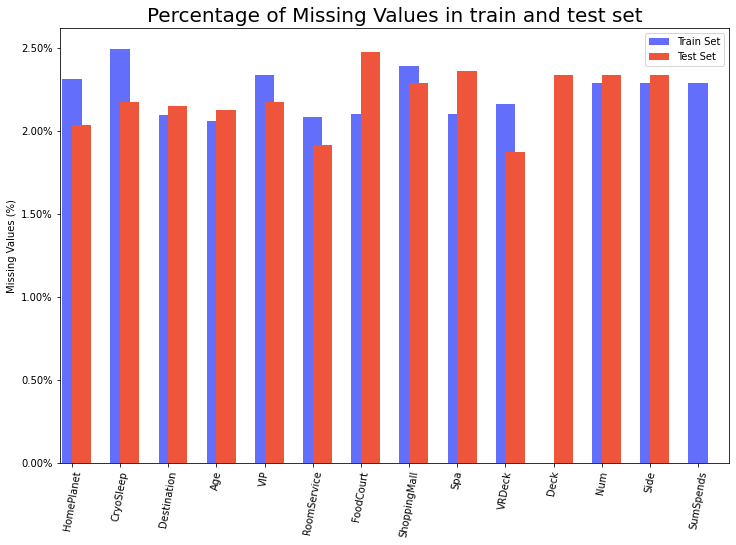

In [15]:
%matplotlib inline 
import matplotlib.ticker as mtick
palette = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
sns.set_palette(palette)
fig,ax = plt.subplots(1,1, figsize=(12,8))
(train_df.isnull().mean()*100).plot(kind='bar', ax=ax, align='center', width=.4)
(test_df.isnull().mean()*100).plot(kind='bar', ax=ax, align='edge',width=.4, color=palette[1])
plt.legend(labels=['Train Set','Test Set'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='x', labelrotation=80)
ax.set_ylabel('Missing Values (%)')
ax.set_title('Percentage of Missing Values in train and test set',fontsize=20);
plt.show()

* Chart แสดงสัดส่วน Missing Values ในแต่ละคอลัมน์ของ train data และ test data
>คอลัมน์ CryoSleep มี Missing Values ใน train data มากที่สุด 
และคอลัมน์ FoodCourt มี Missing Values ใน test data มากที่สุด

In [16]:
print(f'Train DF shape: {train_df.shape}')
print(f'Test DF shape: {test_df.shape}')

Train DF shape: (8693, 16)
Test DF shape: (4277, 14)


ใช้วิธี Ordinal Encoder ในการแปลงข้อมูลจาก Nominal data ให้เป็น Ordinal data เนื่องจากเป็นโจทย์ปัญหาประเภท Binary Classification

In [17]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()

df_for_encode = pd.concat([train_df, test_df])

df_for_encode[object_cols] = df_for_encode[object_cols].astype('category')

df_for_encode[object_cols] = oc.fit_transform(df_for_encode[object_cols])

del train_df, test_df

train_df = df_for_encode.iloc[:8693, :]
test_df = df_for_encode.iloc[8693: , :]

del df_for_encode

test_df.drop('Transported', inplace=True, axis=1)

In [18]:
print(f'Train DF shape: {train_df.shape}')
print(f'Test DF shape: {test_df.shape}')

Train DF shape: (8693, 16)
Test DF shape: (4277, 15)


จัดการค่า Null value ด้วยการแทนด้วยค่าเฉลี่ยของแต่ละคอลัมน์ เพื่อให้ข้อมูลครบถ้วนสมบูรณ์

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([("imp", SimpleImputer(strategy='mean'), null_cols)])
    
train_df[null_cols] = ct.fit_transform(train_df[null_cols])
test_df[null_cols] = ct.fit_transform(test_df[null_cols])

In [20]:
null_value=train_df.isnull().sum()
null_value

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
SumSpends       0
Expenditure     0
dtype: int64

แบ่งข้อมูล train และ test โดยใช้ K-fold Cross Validation ซึ่งเป็นวิธีการแบ่งข้อมูลให้เป็น k ส่วนเท่า ๆ กัน เพื่อสร้าง และทดสอบ Model คำนวณค่าเฉลี่ย Accuracy หรือ Error ก่อนที่จะนำโมเดลไปใช้ทำนายข้อมูล test set

In [21]:
X = train_df.copy()
y = X.pop('Transported')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.3)
kfold = KFold(n_splits=5, shuffle=True, random_state=10) 

# Model selection
เป็นขั้นตอนการคัดเลือก Model โดยทำการทดสอบเพื่อเปรียบเทียบประสิทธิภาพการทำงานของแต่ละ Model เพื่อหา Model ที่ดีที่สุดในการทำนายค่า Transported ซึ่ง Model ที่จะนำมาทดสอบมี ดังนี้
*   CatBoost Classifier
*   Decision Tree Classifier
*   Random Forest Classifier
*   LGBM Classifier
*   XGB Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

In [23]:
model_factory = [CatBoostClassifier(verbose=False), 
                 LGBMClassifier(objective='binary'),
                 RandomForestClassifier(n_jobs=-1),
                 XGBClassifier(objective='binary:logistic'),
                 DecisionTreeClassifier()] 
                
val = []
model_name = []

for model in model_factory:
    mf = model.fit(x_train, y_train)
    Pred = mf.predict(x_test)
    scores=cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    print(model.__class__.__name__, " : Train Accuracy: ", accuracy_score(y_test, Pred), " : Validation Accuracy : ", np.mean(scores))
    model_name.append(model.__class__.__name__)
    val.append(np.mean(scores).item())

CatBoostClassifier  : Train Accuracy:  0.8109662576687117  : Validation Accuracy :  0.8065735414954807
LGBMClassifier  : Train Accuracy:  0.8048312883435583  : Validation Accuracy :  0.8003286770747741
RandomForestClassifier  : Train Accuracy:  0.8044478527607362  : Validation Accuracy :  0.7975349219391947
XGBClassifier  : Train Accuracy:  0.7956288343558282  : Validation Accuracy :  0.7939194741166803
DecisionTreeClassifier  : Train Accuracy:  0.7404141104294478  : Validation Accuracy :  0.742481511914544


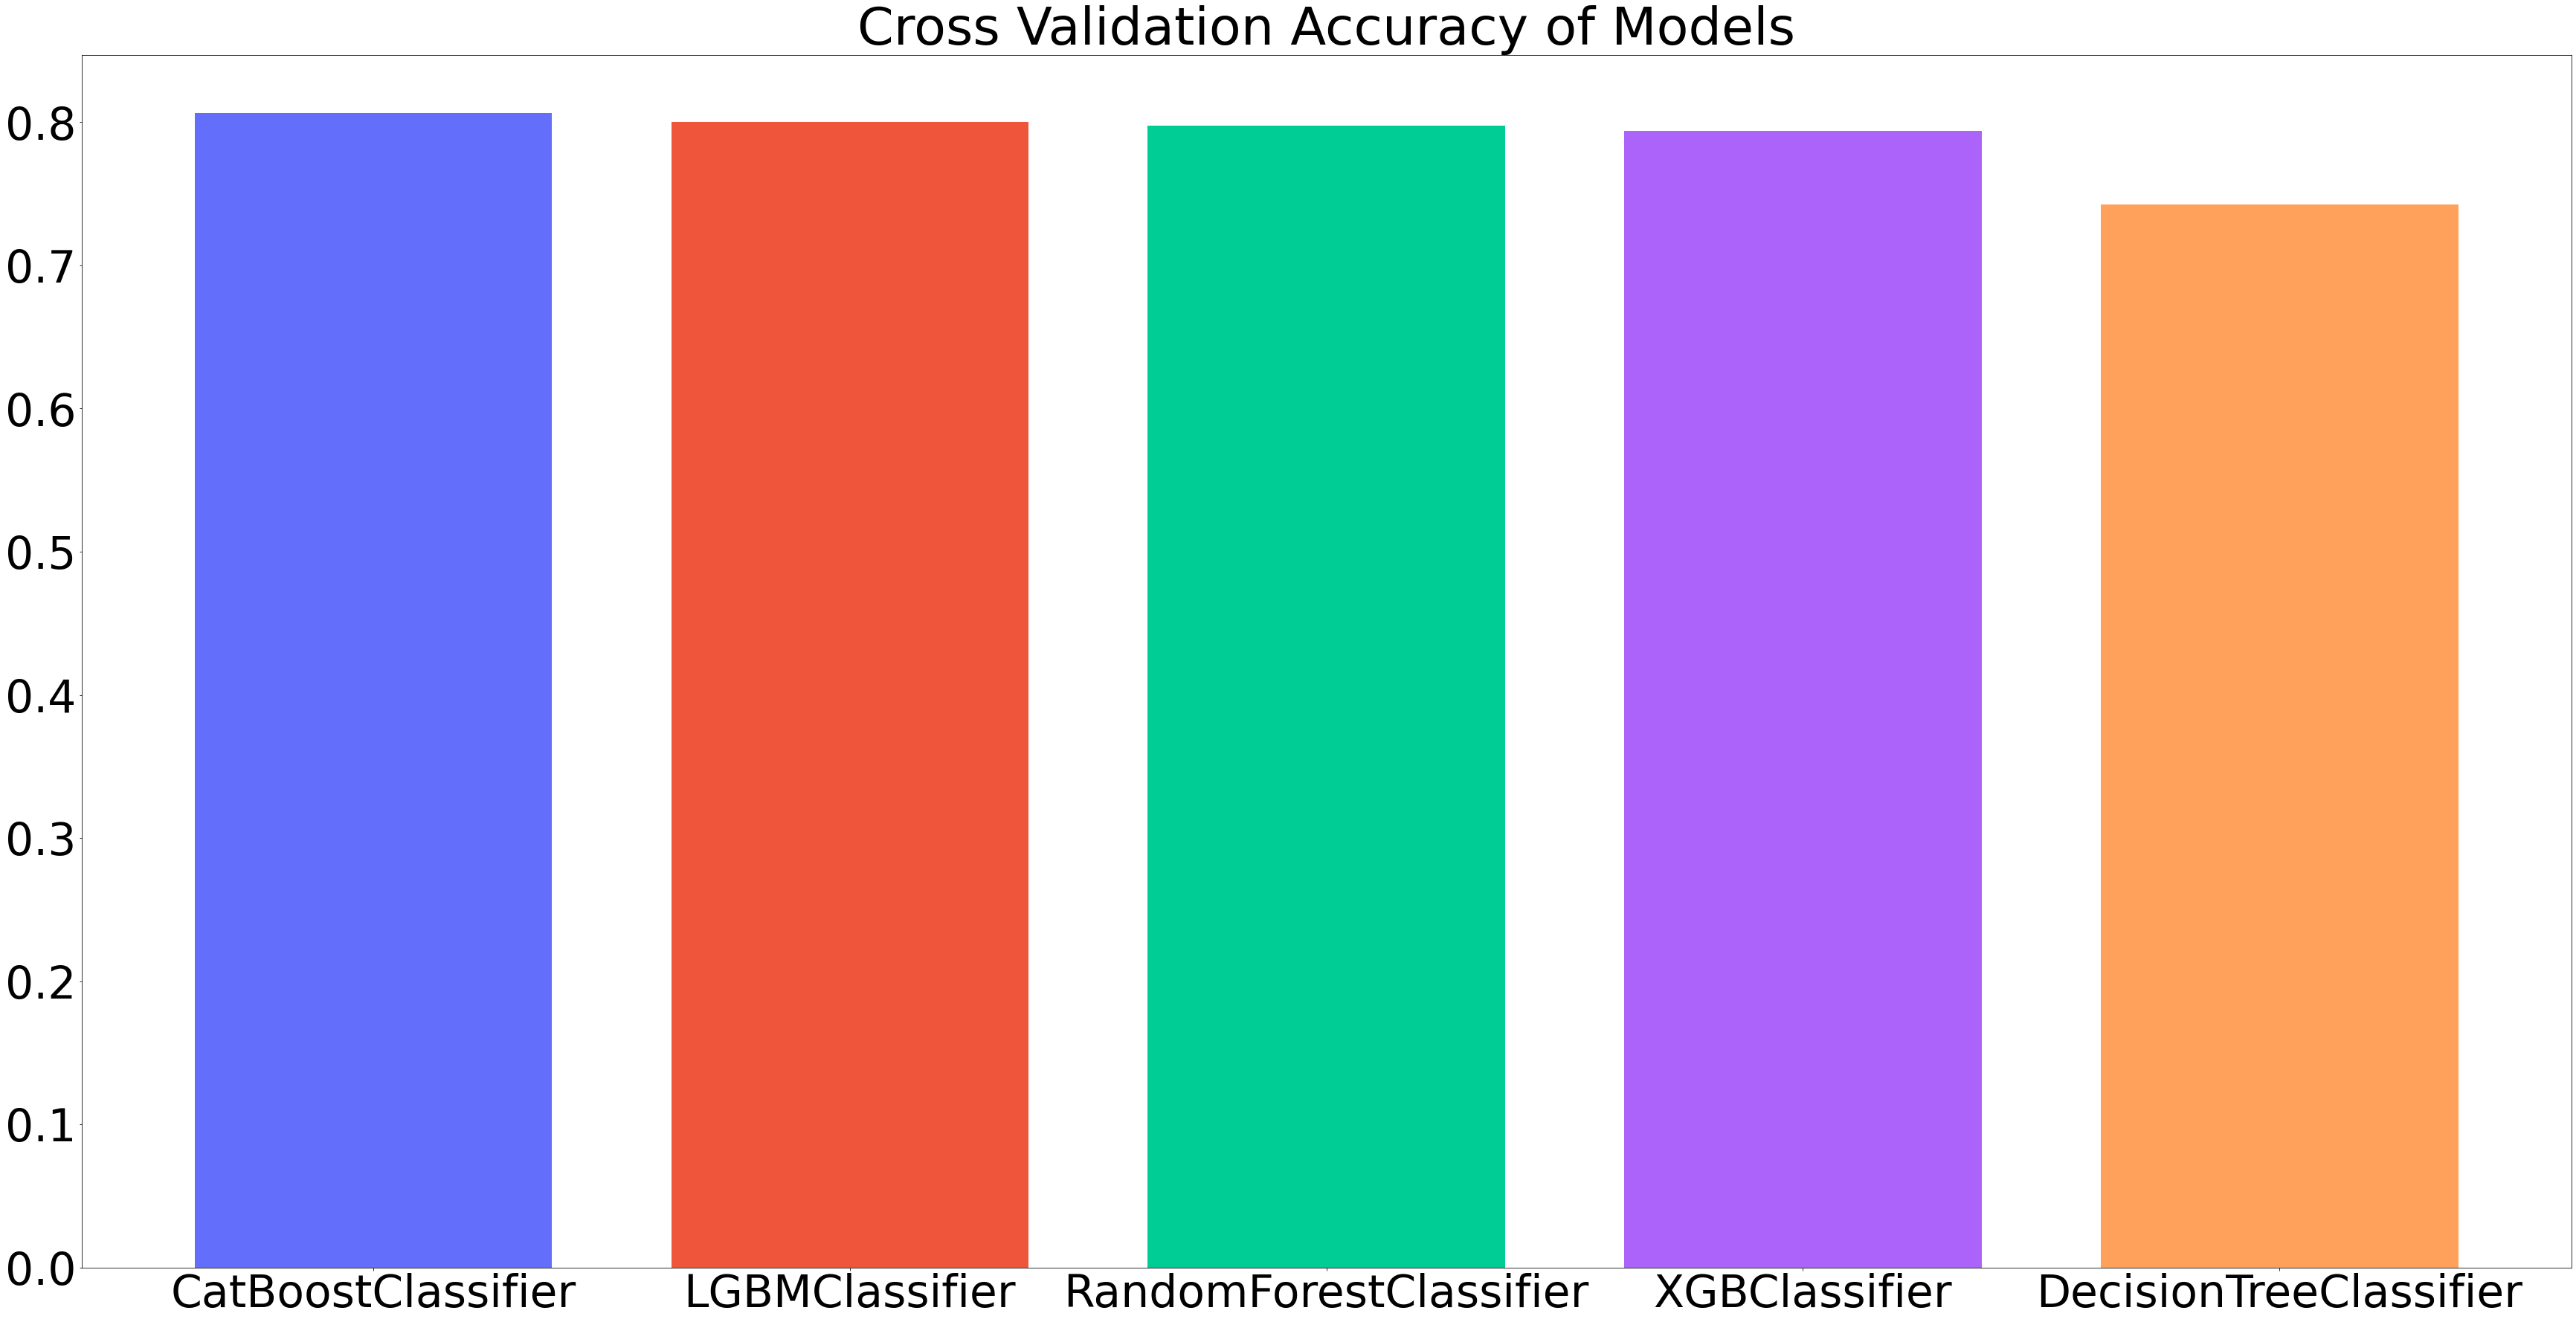

In [24]:
fig = plt.figure(figsize = (60,30))
plt.bar(model_name, val, color=palette, width=0.75)
plt.title('Cross Validation Accuracy of Models',fontsize=70)
plt.tick_params(axis='both', which='major',labelsize=60)
plt.show()

* Chart แสดงสัดส่วนจากการทดสอบความแม่นยำของ Model โดยแต่ละ Model มีค่า Validation Accuracy ดังนี้
>   * CatBoostClassifier : 0.809
>   * LGBMClassifier : 0.800
>   * RandomForestClassifier : 0.798
>   * XGBClassifier : 0.794
>   * DecisionTreeClassifier : 0.743

จากการทดสอบแต่ละ Model พบว่า CatBoost Classifier มีความแม่นยำของ Model สูงที่สุด โดยมีค่า Train Accuracy อยู่ที่ 0.812 และค่า Validation Accuracy อยู่ที่ 0.809

### CatBoost Classifier
>CatBoost Classifier มาจาก category & boosting ซึ่งเป็นวิธี Gradient Boosting ชนิดหนึ่ง ถูกพัฒนามาเพื่อจัดการกับข้อมูล categorical data  ซึ่งช่วยเพิ่มประสิทธิภาพการทำงานของ Model และสามารถทำนายค่าได้อย่างรวดเร็ว 

>CatBoost มีหลักการทำงานคล้ายกับ Gradient boosting model ซึ่งเป็นการนําเอา Decision Tree มาทําการ Train ต่อกันหลาย ๆ รอบ และเรียนรู้จากความผิดพลาดของต้นไม้ก่อนหน้า โดยจะมีการให้น้ำหนักทีแตกต่างกันออกไป ถ้า Classifier ไหนที่มีการทํานายผิดบ่อย ๆ จะให้นํ้าหนักมากกว่าเพื่อให้มีการสุ่มขึ้นมาใหม่อีกครั้ง และทําการทํานายค่าไปเรื่อย ๆ
ซึ่งจะทําให้มีความแม่นยําเพิ่มขึ้นเรื่อย ๆ ในแต่ละรอบ โดยโมเดลจะทําการหยุดก็ต่อเมื่อมีการ Train ที่ลึกเกินไปจนโมเดลไม่สามารถหารูปแบบของความผิดพลาดได้จากต้นไม้ก่อนหน้าหรือได้ผลรวมของ
classifier ที่ดีที่สุดแล้ว

<div style="width:100%;text-align: center;"> <img align=middle src="https://cdn.discordapp.com/attachments/756022438050922558/1036279265307664434/unknown.png" alt="Heat beating" > </div>




# Feature selection 
คือ ขั้นตอนการลดขนาดหรือมิติของข้อมูล แต่ยังคงลักษณะสำคัญของข้อมูลอยู่ โดยในขั้นตอนนี้ใช้วิธี Sequential Backward คือ การเลือกย้อนหลังหรือลบฟีเจอร์เพื่อสร้างชุดย่อยของฟีเจอร์ในแต่ละขั้นตอน เครื่องมือนี้จะเลือกฟีเจอร์ที่ดีที่สุดในการลบตาม Cross Validation Score จากนั้นจะได้ฟีเจอร์ที่เหมาะสมสำหรับนำไปเทรน Model ต่อ ดังนี้
* CryoSleep
* RoomService 
* Spa
* VRDeck
* Deck
* Side
* SumSpends


In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
model_fs = CatBoostClassifier(verbose=False)
sf = SequentialFeatureSelector(model_fs, scoring='accuracy', direction = 'backward')
sf.fit(X, y)

SequentialFeatureSelector(direction='backward',
                          estimator=<catboost.core.CatBoostClassifier object at 0x7f559d29f110>,
                          scoring='accuracy')

In [26]:
best_features_cat = list(sf.get_feature_names_out())
best_features_cat

['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'Deck', 'Side', 'Expenditure']

# Hyperparameter Optimization by using Grid Search
* Hyperparameter คือ พารามิเตอร์ที่มีค่าที่ใช้ในการควบคุมกระบวนการเรียนรู้ เป็นค่าที่ไม่สามารถหาได้จากข้อมูล ช่วยให้โมเดลมีประสิทธิภาพมากขึ้น ซึ่งจะถูกกำหนดค่าไว้ล่วงหน้าก่อนที่จะทำการเทรนโมเดล โดย hyperparameter ที่จำเป็นของ catboost มีดังนี้
    - learning rate คือ Hyperparameter ตัวหนึ่งที่ควบคุมว่าในหนึ่ง Step ของการเทรน เราจะปรับ Weight ของ Neural Network มากน้อยแค่ไหน ถ้า Learning Rate มีค่าน้อย Weight ของโมเดลก็จะเปลี่ยนแปลงน้อย การทำงานของโมเดลก็จะเปลี่ยนไปน้อย Loss ก็ไม่ค่อยเปลี่ยนเท่าไร ถ้า Learning Rate มีค่ามาก Weight ของโมเดลก็จะเปลี่ยนแปลงมาก การทำงานของโมเดลก็จะเปลี่ยนไปมาก Loss ก็จะเปลี่ยนแปลงมาก
    - iteration คือ data frame สำหรับกระบวนการค้นหาไฮเปอร์พารามิเตอร์ เป็นการวนซ้ำแบบวนซ้ำ หรือขั้นตอนซ้ำๆ ของการปรับจูนบน subset ขนาดเล็ก จากนั้นทำการทดสอบกับ validation set ในการกวาดแต่ละครั้ง ส่งผลให้ตัดสินใจโดยปริยายว่าไฮเปอร์พารามิเตอร์ใดจะคงอยู่ในโค้ดและพารามิเตอร์ใดที่จะทดสอบโดยเปลี่ยนพารามิเตอร์เหล่านั้น ดังนั้นหนึ่งในตัวเลือกแรกคือจำนวนการเปลี่ยนแปลงในแต่ละครั้ง
    - depth คือ อัลกอริธึมการเรียนรู้ของเครื่องที่สามารถทำงานการถดถอยและการจัดหมวดหมู่ได้ เพื่อให้เข้าใจถึงโครงสร้างการตัดสินใจ ให้ดูโครงสร้างที่เหมือนต้นไม้แบบกลับหัว (เหมือนของต้นไม้ครอบครัว) เราเริ่มต้นที่รากของต้นไม้ที่มีข้อมูลการฝึกของเรา ที่รูท เราแบ่งชุดข้อมูลของเราออกเป็นลีฟโหนดแยกตามเงื่อนไขบางประการ เช่น การใช้ลูป if/else
    - l2 คือ วิธีการปรับโมเดลที่ใช้ในการวิเคราะห์ข้อมูลใดๆ วิธีนี้ดำเนินการทำให้เป็นมาตรฐาน L2 เมื่อปัญหาของ multicollinearity เกิดขึ้น กำลังสองน้อยที่สุดจะไม่เอนเอียง และความแปรปรวนมีมาก ส่งผลให้ค่าที่คาดการณ์ไว้อยู่ไกลจากค่าจริง
    

* Hyperparameter Optimization คือ การค้นหาการรวมกันของไฮเปอร์พารามิเตอร์ที่ return โมเดลที่เหมาะสมที่สุด ซึ่งจะช่วยลดฟังก์ชันการสูญเสียที่กำหนดไว้ล่วงหน้า และเพิ่มความแม่นยำให้กับข้อมูล วิธีการค้นหา Hyperparameter มีด้วยกันทั้งสิ้น 3 วิธี ได้แก่ Manual Search, Grid Search และ Random Search ซึ่งในครั้งนี้ได้ทำการเลือกใช้ Grid Search

* Grid Search คือ การค้นหาแบบกริด เป็นเทคนิคที่ใช้ในการหาค่า Hyperparameter ที่เข้าใจง่ายและตรงไปตรงมา ด้วยการลองใช้พารามิเตอร์ที่กำหนดไว้ล่วงหน้าทุกชุด และประเมินประสิทธิภาพหรือความแม่นยำของโมเดลแต่ละชุด จะเป็นการลองสร้างโมเดลจากค่าของ Hyperparameter ทุกชุด รูปแบบของการทำงานจะคล้ายกริด โดยค่าทั้งหมดจะอยู่ในรูปของ Matrix พารามิเตอร์แต่ละชุดจะถูกนำมาพิจารณาและสังเกตความถูกต้อง เมื่อชุดของ Hyperparameter ทั้งหมดได้รับการประเมินแล้ว โมเดลที่มีชุดพารามิเตอร์ที่ให้ความแม่นยำสูงสุดจะถือว่าดีที่สุด

เริ่มจากการสร้าง list ของ hyperparameters dictionary เพื่อกำหนดค่าพารามิเตอร์และค่าที่ต้องปรับ ในการทำ Grid Search เราสามารถใช้ Library ของ Scikit-learn ที่เรียกว่า GridSearchSV() วิธีนี้จะทำการสร้างโมเดลโดยใช้ Hyperparameter ทุกชุดเพื่อหา ชุดของ Hyperparameter ที่ดีที่สุด โดย 
* Param_grid คือ hyperameter ที่ต้องการ tune
* Scoring คือ ให้ทำการวัดค่าด้วย Accuracy
* cv คือการทำ Cross Validation
* N-job คือ ทำให้ run แบบ parallel

In [27]:
params = {'iterations': [500,1000,1500],'depth':[2,3,7], 
          'learning_rate':[0.01,0.05,0.1], 'l2_leaf_reg': [0.05,0.01]}
model_cat = GridSearchCV(CatBoostClassifier(verbose=False), param_grid=params, scoring='accuracy', cv=kfold, n_jobs=-1)
model_cat.fit(X[best_features_cat],y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f559d2b4cd0>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 7], 'iterations': [500, 1000, 1500],
                         'l2_leaf_reg': [0.05, 0.01],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [28]:
print(model_cat.best_params_)

{'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 0.01, 'learning_rate': 0.01}


# Prediction and Evaluate Model
โดยเราจะใช้ Confusion Matrix ในการในการประเมินผลลัพธ์ เนื่องจากเป็นตารางที่ใช้ในปัญหา Classification เพื่อประเมินข้อผิดพลาดของโมเดล แถวจะแสดงถึงคลาสจริงที่ผลลัพธ์ควรเป็น ในขณะที่คอลัมน์แสดงถึงการคาดการณ์ที่เราทำ การใช้ตารางนี้ทำให้ง่ายต่อการดูว่าคำทำนายใดผิด
เป็นอีกหนึ่งการประเมินโมเดลโดยการนำเอาองค์ความรู้ด้านเมทริกซ์มาประกอบกันเป็นการทำ Classification evaluate โดยเมทริกซ์ตัวนี้สามารถอธิบายค่า TP, TN, FN และ FP ของคำตอบของเราได้ เพื่อนำมาเช็คว่าเราทายผิดไปเยอะแค่ไหน

เรียก accuracy_score เพื่อทำการเช็คความแม่นยำของโมเดล

In [29]:
cat_pred=model_cat.predict(x_test)
print("accuracy_score = ",accuracy_score(y_test.values,cat_pred))

accuracy_score =  0.8665644171779141


โดยจากการใช้ Confusion Matrix ค่าจะออกมาเป็น matrix ยังสามารถหา Precision , Recall และ F1_score ได้

* TP = 1067
* FP = 214
* FN = 134
* TN = 1193

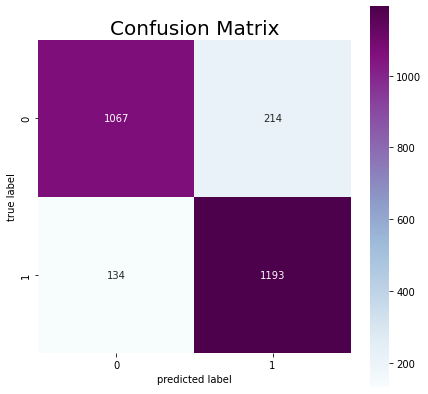

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,cat_pred)
%matplotlib inline 
plt.figure(figsize=(7,7))
plt.title("Confusion Matrix",fontsize=20)
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

เรียก  Precision, Recall และ F1_score เข้าด้วยกันด้วยคำสั่งเดียวได้ด้วยคำสั่ง classification_report โดย
* Precision: ค่าความแม่นยำ เกิดจากการนำ ค่า TP มาเทียบกับ FP
* Recall: ค่าความถูกต้อง เกิดจากการนำค่า TP มาเทียบกับ FN
* F1-score: ค่าเฉลี่ยของ Precision และ Recall

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1281
         1.0       0.85      0.90      0.87      1327

    accuracy                           0.87      2608
   macro avg       0.87      0.87      0.87      2608
weighted avg       0.87      0.87      0.87      2608



ต่อมาทำการ import roc_curve และ auc โดย 
* roc_curve หรือ Receiver operating characteristic curve คือ เส้นโค้งที่พล็อตกราฟระหว่างค่า Sensitivity และ 1-specificity โดย
แกน y แทน Sensitivity และ แกน x แทน 1-specificity ที่จุดตัดต่างๆเพื่อแบ่งผลลัพธ์ของการ
พยากรณ์ออกเป็นกลุ่มเหตุการณ์ที่สนใจและเหตุการณ์ที่ไม่ได้สนใจ เป็นตัวบอก test performance วิธีหนึ่ง ซึ่งสามารถบอกจุด cut-off ที่เหมาะสมที่สุดได้ ว่า ณ จุดไหนที่มีความแม่นยำของ test เกิดขึ้นสูงที่สุด และน่าเชื่อถือที่สุด เราจึงสามารถใช้เลือกจุดนั้นมาเป็นจุด cut-off ได้เลย
* auc หรือ Area under the ROC curve คือ ค่าที่ถูกใช้ในการบ่งบอกความ
ถูกต้องของการพยากรณ์พื้นที่ใต้โค้ง ROC โดยถ้าพื้นที่ใต้โค้ง ROC มีค่ามาก แสดงว่าตัวแบบนั้นมีความถูกต้องมากเช่นกัน

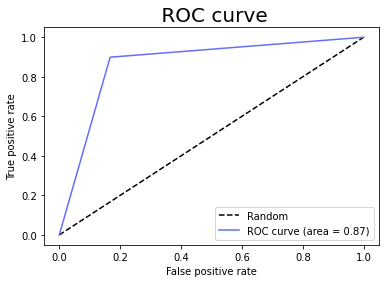

<Figure size 4320x1440 with 0 Axes>

In [32]:
%matplotlib inline 
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, cat_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(" ROC curve" ,fontsize=20)
plt.legend(loc='best')
plt.figure(figsize=(60,20))
plt.show()

จากผลลัพธ์จะเห็นได้ว่ามีพื้นที่ใต้โค้ง ROC อยู่ที่ 0.87 ซึ่งถือเป็นค่าที่มากแสดงให้เห็นถึงความถูกต้องของโมเดล

# Conclusion
เนื่องจากค่า auc, F1, Precision,Recall และ Accuracy มีค่าเท่ากัน แสดงว่าโมเดลที่เลือกใช้นั้นมีค่าที่แม่นยำมากที่สุด ไม่ Overfitting และ Underfitting

# Submission

เก็บค่าทำนายลงใน DataFrame และเซฟเป็นไฟล์ CSV 

In [33]:
prediction = model_cat.predict(test_df)
prediction

array([1., 0., 1., ..., 1., 0., 1.])

In [34]:
final = pd.DataFrame()
final.index = test_df.index
final['Transported'] = prediction
final['Transported'].replace(0, False, inplace=True)
final['Transported'].replace(1, True, inplace=True)
final.to_csv('submission.csv')

# Reference 

* Great Learning Team. (2022). What is Ridge Regression?. Retrieved from https://www.mygreatlearning.com/blog/what-is-ridge-regression/

* MISAEL C RIBEIRO. (2022, August 15). 81% - Models + Backward Feature Selection. Retrieved from https://www.kaggle.com/code/misaelcribeiro/81-models-backward-feature-selection

* Mr.P L. (2018). Evaluate Model นั้นสำคัญอย่างไร ? : Machine Learning 101. Retrieved from https://medium.com/mmp-li/evaluate-model-precision-recall-f1-score-machine-learning-101-89dbbada0c96

* PureYo's Clinical Research Academy. (2018). ROC curve คืออะไร?. Retrieved from https://www.facebook.com/pureyoacademy/posts/586982888309714/

* sklearn.feature_selection.SequentialFeatureSelector. (2022). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

* Stacey Svetlichnaya. (2020). Hyperparameter Search with Iterative Sweeps. Retrieved from https://towardsdatascience.com/hyperparameter-search-with-iterative-sweeps-3799df1a4d45

* Surapong Kanoktipsatharporn. (2019). Learning Rate คืออะไร ปรับยังไงให้พอดี Epoch คืออะไร สำคัญอย่างไร กับการเทรน Machine Learning – Hyperparameter Tuning ep.1. Retrieved from https://www.bualabs.com/archives/618/learning-rate-deep-learning-how-to-hyperparameter-tuning-ep-1/

* ทินกร ม้าลายทอง. (2564). เพิ่มประสิทธิภาพของ Machine Learning Model ด้วย Hyperparameter Optimization. สืบค้นจาก https://bigdata.go.th/big-data-101/machine-learning-model-hyperparameter-optimization/

* เบญจพร เอี่ยมประโคน1 , และ ณัตติฤดี เจริญรักษ. วิธีการเปรียบเทียบพื้นที่ใต้ ้โค้ง ROC สําหรับข้อมูลชุดเดียวกัน :
กรณีศึกษาแบบจําลองคะแนนเครดิต. สืบค้นจาก https://scholar.utcc.ac.th/bitstream/6626976254/3912/1/0072%20%E0%B9%80%E0%B8%9A%E0%B8%8D%E0%B8%88%E0%B8%9E%E0%B8%A3%20%E0%B9%80%E0%B8%AD%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%A1%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%82%E0%B8%84%E0%B8%99.pdf

* สกุลกาญจน์ ทองคำ, และ นุวีย์ วิวัฒนวัฒนา, การเรียนรู้ของเครื่องเพื่อการทำนายการผิดนัดชำระของลูกหนี้บัตรเครดิต, (คณะวิทยาศาสตร์ มหาวิทยาลัยศรีนครินทรวิโรฒ, 2565), หน้า 44. 

* อติวิชญ์ ชนินทร์โชดึก, และ เอกรัฐ รัฐกาญจน์, การจัดการความเสี่ยงในการผิดนัดชำระหนี้ส่วนบุคคลแบบออนไลน์, (คณะสถิติประยุกต์ สถาบันบัณฑิตพัฒนบริหารศาสตร์, 2564),หน้า 4.